<center>
<a href="http://www.udem.edu.co/"><img src="Escudo.png"></a>
<h1>Reconocimiento de Patrones I y II</h1>
<h2>Preprocesamiento de imágenes digitales</h2>
<h3>2018-2</h3>
</center>

### Recordar...

Las principales técnicas de procesamiento digital de imágenes mejoran y realzan sus características.
Las operaciones que son llevadas a cabo por este tipo de técnicas implican la alteración del
histograma de la imagen o el procesamiento del valor de sus píxeles.


## Negativo, brillo y contraste

A través del histograma de la imagen se pueden alterar ciertas características que ésta posee. Las
más comunes son el brillo y el contraste. Además de estas dos, la obtención del negativo ha sido
ampliamente utilizada en fotografía (Figura 1.)

<img src="Fig_1.png">

### Brillo: 

Para modificar el brillo de una imagen se añade una cierta cantidad al valor de
intensidad de cada uno de los píxeles. Si esta cantidad es positiva se aumenta el brillo de la
imagen. Por el contrario, si es negativa, se disminuye. Si los valores obtenidos sobrepasan los
extremos del intervalo de posibles niveles de intensidad, se establecen el máximo y el mínimo
de dicho intervalo como nuevos valores en cada caso. Cuando se aplica la operación de brillo
sobre una imagen se produce un desplazamiento del histograma.

### Contraste: 

El contraste mide la diferencia de intensidades en los colores de una imagen. El
aumento o disminución del contraste de una imagen se traduce como la compresión o
expansión del histograma respectivamente. Para ajustar el contraste de una imagen se han de
seleccionar dos valores de intensidad entre los cuales se ajustará el nuevo histograma, $C_{max}$ y
$C_{min}$ y aplicar las siguientes fórmulas según se desee disminuir o aumentar el contraste
respectivamente.

<img src="Ec_1.png">

Donde $I_{min}$ e $I_{max}$ representan los valores de intensidad mínimo y máximo de la imagen.

### Negativo:

El negativo de una imagen se obtiene restando el valor de cada píxel al mayor valor
de intensidad posible $L-1$.

## Ejemplos y ejercicios

### Ejemplo 1

Aumentar el brillo de la imagen de prueba en 50.

### Ejercicio 1

Disminuir el brillo de la imagen de prueba en 70. Graficar el histograma de la imagen original y después de haber disminuido el brillo y analizar el efecto que tiene esta operación sobre el histograma de la imagen.

### Ejercicio 2

- Construir un método para aumentar o disminuir el contraste de una imagen.
- Aplicar un aumento de contraste a la imagen de prueba.
- Graficar el histograma de la imagen original y el de la imagen con el contraste aumentado y analizar el efecto de dicha operación sobre el histograma.


### Ejercicio 3

Obtener el negativo de la imagen de prueba.

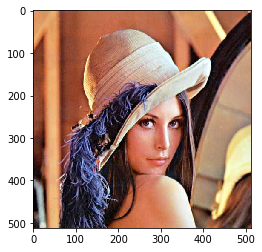

In [99]:
%matplotlib inline
from PIL import Image             #Estamos usando la librería Pillow con PIL
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica

I = Image.open("img/img1.jpg")
#Para visualizar la imagen en el notebook
plt.imshow(np.asarray(I))
plt.show()

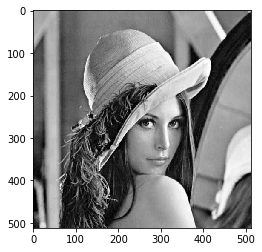

(512, 512) L None


In [100]:
I_gris = I.convert('L')
#I_gris.show()
plt.imshow(np.asarray(I_gris), cmap='gray')
plt.show()
print (I_gris.size, I_gris.mode, I_gris.format)

In [101]:
Img = np.asarray(I_gris,dtype=np.float32)   #convierte el objeto I1 en una matriz de tipo float32.

### Aumentando el brillo de la imagen en 50

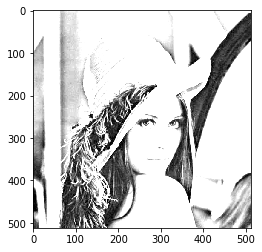

In [102]:
#Ya las imagenes las tenemos en escala de grises

b = 150
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+b
        if new_x > 255:
            new_x = 255
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

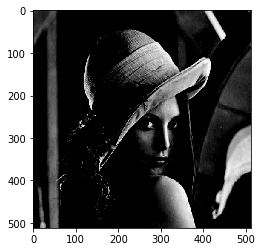

In [103]:
#Ya las imagenes las tenemos en escala de grises

b = -150
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+b
        if new_x < 0:
            new_x = 0
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

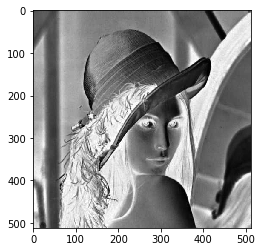

In [104]:
## Negativo
b = 255
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_Img[i,j] = b - Img[i,j]

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

(-0.5, 511.5, 511.5, -0.5)

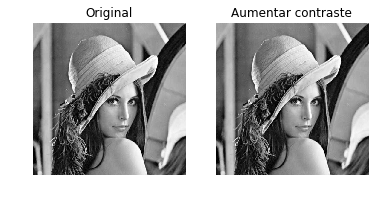

In [105]:
def Disminuir_contraste(Cmax,Cmin,image):
    Imax = np.amax(np.array(image))
    Imin = np.amin(np.array(image))
    filas = np.size(Img,0)
    columnas = np.size(Img,1)
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            new_Img[i,j] = ((Cmax-Cmin)/(Imax - Imin))*(image[i,j]-Imin)+Cmin  
    return new_Img

def Aumentar_contraste(Cmax,Cmin,image):
    Imax = np.amax(np.array(image))
    Imin = np.amin(np.array(image))
    filas = np.size(Img,0)
    columnas = np.size(Img,1)
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            new_Img[i,j] = ((image[i,j] - Imin)/(Imax - Imin))*(Cmax-Cmin)+Cmin           
    return new_Img


plt.subplot(121)
plt.imshow(Img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(Aumentar_contraste(254,100,Img),cmap='gray')
plt.title('Aumentar contraste')
plt.axis('off')

#plt.subplot(122)
#plt.imshow(Disminuir_contraste(254,10,Img),cmap='gray')
#plt.title('Disminuir contraste')
#plt.axis('off')

#### Comparando los histogramas

In [106]:
#Genera el historama de la imagen
hist,bins = np.histogram(Img.flatten(),256,[0,256])
hist2,bins2 = np.histogram(new_Img.flatten(),256,[0,256])

#Consultar cómo graficar el histograma de las imágenes y hacer el análisis.

### Resuelva los ejercicios 1 y 2

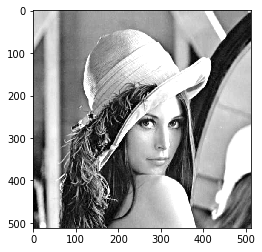

In [107]:
b = 50
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+50
        if new_x > 255:
            new_x = 255
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray') 


## Ecualización del histograma

La ecualización del histograma de una imagen pretende obtener una distribución uniforme de los
píxeles, es decir, que cada nivel de gris tenga la misma probabilidad de aparecer en la imagen. Este método es muy utilizado para mejorar el contraste de las imágenes (Figura 2). En ella se puede ver una distribución más uniforme de los niveles de intensidad en el nuevo histograma además de una mejora en la apreciación de los detalles. Para obtener la ecualización de una imagen se siguen los siguientes pasos:

<img src="Fig_2.png">



1. Se obtiene el histograma normalizado de la imagen, $H$, y se multiplican todas las frecuencias
por el máximo valor de intensidad $L-1$.

2. Se calcula el histograma de frecuencias acumuladas, $H'$. En este caso, cada posición contiene
la suma de todos los valores hasta dicha posición incluyendo el de ella misma. Posteriormente
se redondean los resultados al entero más próximo.

3. El valor de cada nuevo píxel $𝐼'_{ij}$ es reemplazado por el valor de $H'$ en la posición indicada por
el valor de intensidad del píxel original $I_{ij}$, es decir, $𝐼′_{ij}=H'(𝐼_{ij})$.

Recordar...

Si cada frecuencia es dividida entre el número total de píxeles de la imagen se obtiene el histograma
normalizado. En ese caso cada valor obtenido representa la probabilidad de obtener un píxel con el
valor de intensidad al que está asociada la frecuencia, (Freeman, 2005).

## Ejercicio

Imprimir la imagen de prueba después de realizar la ecualización de su histograma.

(-0.5, 511.5, 511.5, -0.5)

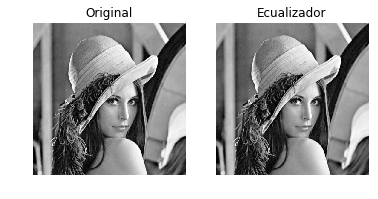

In [114]:
#Genera el histograma de la Imagen
#Paso 1:
dimImg = filas*columnas
#print(dimImg)
hist,bins = np.histogram(Img.flatten(),256,[0,256])
#print(np.max(hist))
hist_norm = (hist/dimImg)*255
#print(np.max(hist_norm))
#print(hist)
#print(hist_norm)

#Paso2:
#Genera la función de distribución acumulada (cdf por sus siglas en inglés)
cdf = hist_norm.cumsum()
cdf1 = np.round(cdf)

#Paso 3:
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        intensidad = Img[i,j]
        new_Img[i,j] = cdf1[int(intensidad)]

plt.subplot(121)
plt.imshow(Img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(Aumentar_contraste(254,100,Img),cmap='gray')
plt.title('Ecualizador')
plt.axis('off')
